# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Naive Bayes based classifier

</font>
</div>

# Naive Bayes classifier
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- In the context of a classification we have:
    - `P(Class|Data)` = conditional probability of a class with given data (aka posterior belief)
    - `P(Data|Class)` = likelihood of data belonging to a certain class distribution
    - `P(Class)` = Prior probability of a given class. This is calculated as the No of samples (rows) for a specific class and divide that by the number of total samples in the dataset.

- **A note on the implementation**: We can omit the denominator, to simplify our calculation, since `P(Data)` can be treated as a normalizing constant. However, we will no longer receive a fraction for the probability ranging from zero to one.
- **Assumption**: the occurrence of one event doesn’t affect the occurrence of the other event. Therefore, all interactions and correlations among the features will simply be ignored. 
- **Main consequenece of this assumption**: we are now able to apply the multiplication rule when calculating the probability of a certain class with multiple features.

</font>
</div>

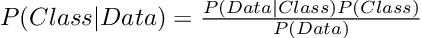

# Import modules
<hr style="border:2px solid black"> </hr>

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Implementation
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- Everytime we are implementing a ML agorithm is easier to think in temr of two methods. Think of these two methods as two actions.
    - First action is the **fit** step: essentially what you have to do before. To be specific -> Calculate the summary statistics and the prior for each class in the (training) dataset
    - Second action is the **predict** step: essetially what you can do after. To be specific -> Calculate the probability of every class for each sample in the (test) dataset. Therefore, get the probability of data given the classes’ (Gaussian) distribution and combine it with the prior.
 
- These two actions/methods are then combine into a single, high-level contenier python class called `NaiveBayes`.

</font>
</div>

In [2]:
class NaiveBayes:
    """
    This is the skeleton of our Naive Bayes classifier.
    """
    
    def fit(self, X, y):
        """Fit method

        Step #1 - get the summary statistics for each class (and feature) 
        as well as the prior. First of all, we need to gather some basic 
        information about the dataset and create three zero-matrices to store
        the mean, the variance, and the prior for each class.

        Step #2 -  Next, we iterate over all the classes, compute the statistics
        and update our zero-matrices accordingly.
        """
        # Step #1
        #----------------------------------------------------
        # get number of samples (rows) and features (columns)
        self.n_samples, self.n_features = X.shape
        # get number of uniques classes
        self.n_classes = len(np.unique(y))

        # create three zero-matrices to store summary stats & prior
        self.mean = np.zeros((self.n_classes, self.n_features))
        self.variance = np.zeros((self.n_classes, self.n_features))
        self.priors = np.zeros(self.n_classes)

        # Step #2
        #----------------------------------------------------    
        for c in range(self.n_classes):
            # create a subset of data for the specific class 'c'
            X_c = X[y == c]

            # calculate statistics and update zero-matrices, rows=classes, cols=features
            self.mean[c, :] = np.mean(X_c, axis=0)
            self.variance[c, :] = np.var(X_c, axis=0)
            self.priors[c] = X_c.shape[0] / self.n_samples    
 
    def predict(self, X):
        # for each sample x in the dataset X
        y_hat = [self.get_class_probability(x) for x in X]
        return np.array(y_hat)

    def get_class_probability(self, x):
        """
        The method iterates over all classes, collects the summary statistics, 
        the prior, and calculates the new posterior belief for a single sample.
        
        We apply log-transformation, in order to simplify the calculations by 
        enabling addition of probabilities. We also return the class index with 
        the highest posterior belief.
        """
        # store new posteriors for each class in a single list
        posteriors = list()

        for c in range(self.n_classes):
            # get summary stats & prior
            mean = self.mean[c]
            variance = self.variance[c]
            prior = np.log(self.priors[c])
            
            # calculate new posterior & append to list
            posterior = np.sum(np.log(self.gaussian_density(x, mean, variance)))
            posterior = prior + posterior
            posteriors.append(posterior)
        
        # return the index with the highest class probability
        return np.argmax(posteriors)

    def gaussian_density(self, x, mean, var):
        """
        In order to make a prediction, we need to get the probability of data belonging 
        to a certain class or more specifically, coming from the same distribution.

        To make our life easier, we assume that the data’s underlying distribution is 
        gaussian. We create a class method, which returns the probability for a new sample.
        """
        
        # implementation of gaussian density function
        const = 1 / np.sqrt(var * 2 * np.pi)
        proba = np.exp(-0.5 * ((x - mean) ** 2 / var))
        return const * proba

## Addional info on fit method

<div class="alert alert-info">
<font color=black>

- For example, assume we have two unique classes (0,1) and two features in our dataset. The matrix storing the mean values, therefore will have a two rows and two columns (2x2). One row for each class and one column for each feature.
- The prior is just a single vector (1x2), containing the ratio of a single classes’ samples divided by the total sample size.

</font>
</div>

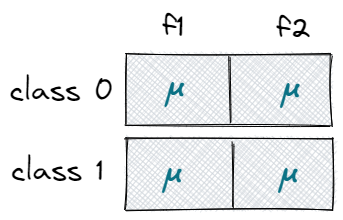

## Additional info on gaussian function

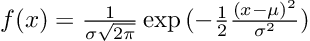

# Testing
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- We will use the iris dataset, which consists of 150 samples with 4 different features (Sepal Length, Sepal Width, Petal Length, Petal Width). 
- Our goal is to predict the correct class among 3 different types of irises’.

</font>
</div>

In [6]:
# load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [7]:
X_train

array([[6.1, 3. , 4.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.6, 2.5, 3.9, 1.1],
       [6.4, 2.8, 5.6, 2.1],
       [5.8, 2.8, 5.1, 2.4],
       [5.3, 3.7, 1.5, 0.2],
       [5.5, 2.3, 4. , 1.3],
       [5.2, 3.4, 1.4, 0.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3. , 5.5, 2.1],
       [5.1, 3.5, 1.4, 0.3],
       [6. , 2.2, 5. , 1.5],
       [6.3, 2.9, 5.6, 1.8],
       [6.6, 2.9, 4.6, 1.3],
       [7.7, 2.6, 6.9, 2.3],
       [5.7, 3.8, 1.7, 0.3],
       [5. , 3.6, 1.4, 0.2],
       [4.8, 3. , 1.4, 0.3],
       [5.2, 2.7, 3.9, 1.4],
       [5.1, 3.4, 1.5, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [7.7, 3.8, 6.7, 2.2],
       [6.9, 3.1, 5.4, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [6.4, 2.8, 5.6, 2.2],
       [6.2, 2.8, 4.8, 1.8],
       [6. , 3.4, 4.5, 1.6],
       [7.7, 2.8, 6.7, 2. ],
       [5.7, 3. , 4.2, 1.2],
       [4.8, 3.4, 1.6, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3. , 1.4, 0.1],
       [4.7, 3

In [8]:
# Instantiate, train and predict Naive Bayes Classifier
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

In [9]:
# Helper function to calculate accuracy
def get_accuracy(y_true, y_hat):
    return np.sum(y_true==y_hat) / len(y_true)

In [10]:
# print results
print('Naive Bayes Accuracy: ', get_accuracy(y_test, predictions))

Naive Bayes Accuracy:  0.9666666666666667


# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- [Code taken from this references](https://towardsdatascience.com/implementing-naive-bayes-from-scratch-df5572e042ac)
- [Deriving Bayes’ Theorem The Easy Way](https://towardsdatascience.com/deriving-bayes-theorem-the-easy-way-59f0c73496db)
- [Understanding Probability Models and Axioms](https://towardsdatascience.com/understanding-probability-models-and-axioms-c0f498972b80)

</font>
</div>